In [1]:
import csv
from datetime import datetime, timedelta
import random
import numpy as np


time_step = 1
period = 52
w = 2*np.pi*time_step/period

phi_AR = 0.62
Sigma_AR = 0.05

ts_train_length = 216
ts_test_length = 52

look_back_steps = 26

A = np.array([[1,1,0,0,0],[0,1,0,0,0],[0,0,np.cos(w) , np.sin(w),0],[0,0,-np.sin(w), np.cos(w),0],[0,0,0,0, phi_AR]])
Q = np.zeros((5, 5))
Q[-1,-1] = Sigma_AR
F = np.array([1,0,1,0,1]).reshape(1, -1)

zB  = np.array([0.1, 1e-18, 1.3, 0, 0.3])    # initial mu for baseline hidden states
SzB = np.array([1E-5, 1E-5, 1E-5, 1E-5, 1E-5])     # var

# Function to generate random float numbers
def generate_float_numbers():
    return round(random.uniform(0.0, 100.0), 2)

# Function to generate datetime values with one-day time step interval starting from a specified date and time
def generate_datetime_values(start_datetime, num_values):
    datetime_values = []
    current_datetime = start_datetime
    for _ in range(num_values):
        datetime_values.append(current_datetime)
        current_datetime += timedelta(days=7)
    return datetime_values

# generate time series
y = []
AR = []
for _ in range(ts_train_length + ts_test_length):
    zB = A @ zB + np.random.multivariate_normal(np.zeros(5), Q)
    yi = F @ zB
    AR.append(zB[-1])
    y.append(yi)

# Generate obs_train.csv
with open('obs_train.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['LT_AR'])  # Write header
    for i in range(ts_train_length):
        writer.writerow([round(float(y[i]), 3)])  # Write random float numbers

# Generate obs_datetime.csv
with open('obs_train_datetime.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['date_time'])  # Write header
    start_datetime = datetime(2023, 1, 1, 12, 0, 0)  # Start datetime
    datetime_values = generate_datetime_values(start_datetime, ts_train_length)
    for dt in datetime_values:
        writer.writerow([dt.strftime('%Y-%m-%d %I:%M:%S')])  # Write formatted datetime string

# Generate obs_train.csv
with open('obs_test.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['LT_AR'])  # Write header
    for i in range(ts_test_length + look_back_steps):
        writer.writerow([round(float(y[i+ts_train_length-look_back_steps]), 3)])  # Write random float numbers

# Generate obs_datetime.csv
with open('obs_test_datetime.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['date_time'])  # Write header
    start_datetime = datetime_values[-1]+ timedelta(days=7-look_back_steps*7) # Start datetime
    datetime_values = generate_datetime_values(start_datetime, ts_test_length+look_back_steps)
    for dt in datetime_values:
        writer.writerow([dt.strftime('%Y-%m-%d %I:%M:%S')])  # Write formatted datetime string




/var/folders/vv/62ff9wx97g72zr4_20vx1q3h0000gn/T/ipykernel_87565/2104872708.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  writer.writerow([round(float(y[i]), 3)])  # Write random float numbers
/var/folders/vv/62ff9wx97g72zr4_20vx1q3h0000gn/T/ipykernel_87565/2104872708.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  writer.writerow([round(float(y[i+ts_train_length-look_back_steps]), 3)])  # Write random float numbers


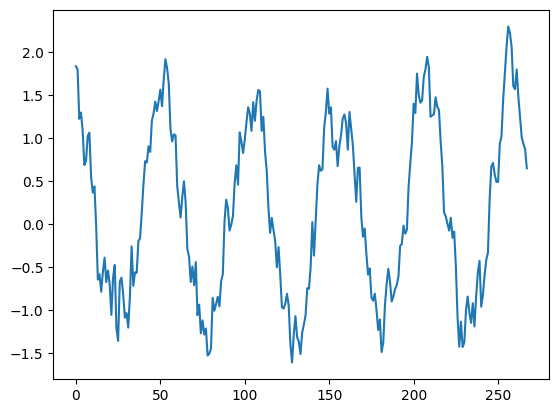

In [2]:
# plot y
import matplotlib.pyplot as plt
plt.plot(y)

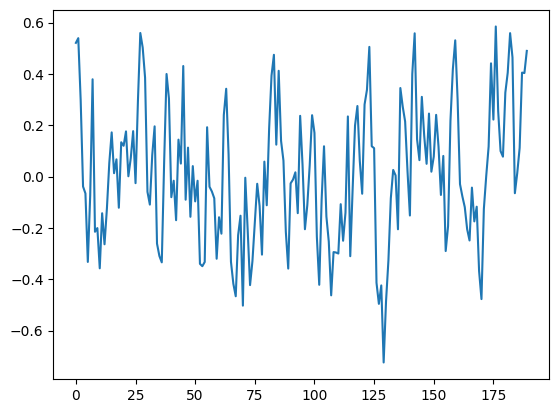

In [3]:
plt.plot(AR[26:26+190])